## Sentimental data Model

In [2]:
# Import findspark and initialize. 
import findspark
findspark.init()
# Import packages
from pyspark.sql import SparkSession
import time
import warnings
warnings.filterwarnings('ignore')
# Create a SparkSession
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()

In [3]:
# 1. Read in the AWS S3 bucket into a DataFrame.
from pyspark import SparkFiles
# Read a CSV file into a DataFrame
sentiment_df = spark.read.csv("CSV_Outputs/final_sentiment_summary_data_df.csv", header=True, inferSchema=True)

# Show the DataFrame
sentiment_df.show()

+--------------------+--------------------+----------+------------------+------------------+
|                  ID|                Text|      Year|         Candidate|     Avg_Sentiment|
+--------------------+--------------------+----------+------------------+------------------+
|7.809256341597962...|The question in t...|      2016|          Democrat|0.3640820575295926|
|7.809161808990372...|"Last night, Dona...|      2016|          Democrat|0.3640820575295926|
|7.809115648577618...|Couldn't be more ...|      2016|          Democrat|0.3640820575295926|
|7.80907038650069e+17|If we stand toget...|      NULL|              NULL|              NULL|
|Make sure you're ...|                2016|  Democrat|0.3640820575295926|              NULL|
|7.808974194626028...|Both candidates w...|      2016|          Democrat|0.3640820575295926|
|7.808931266050376...|Join me for a 3pm...|      2016|        Republican|0.4036780355948681|
|7.808835820511232...|This election is ...|      2016|          Democr

## Step 1. Data Processing Split the data into training and testing datasets by using train_test_split

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
# Load dataset
sentiment_df = pd.read_csv('CSV_Outputs/final_sentiment_summary_data_df.csv')
sentiment_df.head()


,ID,Text,Year,Candidate,Avg_Sentiment
0,7.809256e+17,The question in this election: Who can put the...,2016,Democrat,0.364082
1,7.809162e+17,"Last night, Donald Trump said not paying taxes...",2016,Democrat,0.364082
2,7.809116e+17,Couldn't be more proud of @HillaryClinton. Her...,2016,Democrat,0.364082
3,7.809070e+17,"If we stand together, there's nothing we can't...",2016,Democrat,0.364082
4,7.808974e+17,Both candidates were asked about how they'd co...,2016,Democrat,0.364082


In [6]:
sentiment_df.dropna

<bound method DataFrame.dropna of                   ID                                               Text  Year  \
0       7.809256e+17  The question in this election: Who can put the...  2016   
1       7.809162e+17  Last night, Donald Trump said not paying taxes...  2016   
2       7.809116e+17  Couldn't be more proud of @HillaryClinton. Her...  2016   
3       7.809070e+17  If we stand together, there's nothing we can't...  2016   
4       7.808974e+17  Both candidates were asked about how they'd co...  2016   
...              ...                                                ...   ...   
219714  2.100000e+01  Kamala Harris' potential impact on health care...  2024   
219715  2.200000e+01  Several top Democrats may already be in consid...  2024   
219716  2.300000e+01  Vice President Kamala Harris is winning the en...  2024   
219717  2.600000e+01  Nothing about Kamala Harris' nomination to the...  2024   
219718  2.900000e+01  If Harris earns the nomination, polling conduc...  20

In [7]:
sentiment_df.fillna(0)

,ID,Text,Year,Candidate,Avg_Sentiment
0,7.809256e+17,The question in this election: Who can put the...,2016,Democrat,0.364082
1,7.809162e+17,"Last night, Donald Trump said not paying taxes...",2016,Democrat,0.364082
2,7.809116e+17,Couldn't be more proud of @HillaryClinton. Her...,2016,Democrat,0.364082
3,7.809070e+17,"If we stand together, there's nothing we can't...",2016,Democrat,0.364082
4,7.808974e+17,Both candidates were asked about how they'd co...,2016,Democrat,0.364082
...,...,...,...,...,...
219714,2.100000e+01,Kamala Harris' potential impact on health care...,2024,Democrat,0.378815
219715,2.200000e+01,Several top Democrats may already be in consid...,2024,Democrat,0.378815
219716,2.300000e+01,Vice President Kamala Harris is winning the en...,2024,Democrat,0.378815
219717,2.600000e+01,Nothing about Kamala Harris' nomination to the...,2024,Democrat,0.378815


In [8]:
candidate_df = pd.get_dummies(sentiment_df['Candidate']).astype(int)
candidate_df

,Democrat,Republican
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
219714,1,0
219715,1,0
219716,1,0
219717,1,0


In [9]:
senti_scaled = pd.concat([sentiment_df, candidate_df], axis=1)
senti_scaled

,ID,Text,Year,Candidate,Avg_Sentiment,Democrat,Republican
0,7.809256e+17,The question in this election: Who can put the...,2016,Democrat,0.364082,1,0
1,7.809162e+17,"Last night, Donald Trump said not paying taxes...",2016,Democrat,0.364082,1,0
2,7.809116e+17,Couldn't be more proud of @HillaryClinton. Her...,2016,Democrat,0.364082,1,0
3,7.809070e+17,"If we stand together, there's nothing we can't...",2016,Democrat,0.364082,1,0
4,7.808974e+17,Both candidates were asked about how they'd co...,2016,Democrat,0.364082,1,0
...,...,...,...,...,...,...,...
219714,2.100000e+01,Kamala Harris' potential impact on health care...,2024,Democrat,0.378815,1,0
219715,2.200000e+01,Several top Democrats may already be in consid...,2024,Democrat,0.378815,1,0
219716,2.300000e+01,Vice President Kamala Harris is winning the en...,2024,Democrat,0.378815,1,0
219717,2.600000e+01,Nothing about Kamala Harris' nomination to the...,2024,Democrat,0.378815,1,0


In [10]:
senti_scaled.fillna(sentiment_df.median(numeric_only=True), inplace=True)

In [11]:
# Separate the data into labels (target variable 'party') and features
y = senti_scaled['Democrat']
y

0         1
1         1
2         1
3         1
4         1
         ..
219714    1
219715    1
219716    1
219717    1
219718    1
Name: Democrat, Length: 219719, dtype: int64

In [12]:
X = senti_scaled.drop(columns=['ID','Text','Candidate'])
X

,Year,Avg_Sentiment,Democrat,Republican
0,2016,0.364082,1,0
1,2016,0.364082,1,0
2,2016,0.364082,1,0
3,2016,0.364082,1,0
4,2016,0.364082,1,0
...,...,...,...,...
219714,2024,0.378815,1,0
219715,2024,0.378815,1,0
219716,2024,0.378815,1,0
219717,2024,0.378815,1,0


## Step 2 Create a Logistic Regression Model with the Original Data 

In [13]:
# Import the LogisticRegression module from SKLearn
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [15]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
logistic_classifier = LogisticRegression(solver='lbfgs', random_state=1)

In [17]:
# Fit the model using training data

logistic_classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

#### Save the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model

In [18]:
# Make a prediction using the testing data
logistic_predictions = logistic_classifier.predict(X_test)

#### Evaluate the model’s performance by doing the following:

In [19]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, logistic_predictions)
print(conf_matrix)

[[36300     0]
 [    0 18630]]


In [20]:
# Print the classification report for the model
classification_report=classification_report(y_test, logistic_predictions)
print("Classification_report:")
print(classification_report)   

Classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36300
           1       1.00      1.00      1.00     18630

    accuracy                           1.00     54930
   macro avg       1.00      1.00      1.00     54930
weighted avg       1.00      1.00      1.00     54930



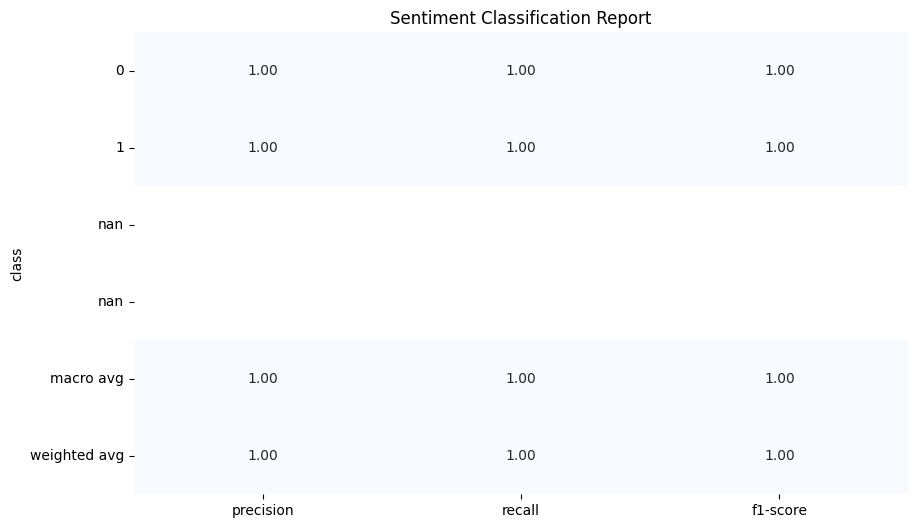

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate the classification report string
# Replace 'y_test' and 'logistic_predictions' with your actual data
report_str = classification_report(y_test, logistic_predictions)

# Convert the classification report string into a DataFrame
classification_data = []  # Ensure this is empty to start
lines = report_str.strip().split('\n')  # Now using the correct string variable

for line in lines[2:]:
    row = {}
    row_data = line.split()
    if len(row_data) == 5:  # for precision, recall, f1-score, support
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1-score'] = float(row_data[3])
        row['support'] = int(row_data[4])
    elif len(row_data) == 6:  # for accuracy, macro avg, weighted avg
        row['class'] = ' '.join(row_data[0:2])
        row['precision'] = float(row_data[2])
        row['recall'] = float(row_data[3])
        row['f1-score'] = float(row_data[4])
        row['support'] = int(row_data[5])
    classification_data.append(row)

# Create a DataFrame from the parsed classification report data
df = pd.DataFrame.from_dict(classification_data)
df.set_index('class', inplace=True)

# Plotting the heatmap with seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(df[['precision', 'recall', 'f1-score']], annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.title("Sentiment Classification Report")
# Save the plot as a .png file
plt.savefig("Visualizations/Sentiment_classification_report.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

##### Display the 2024 Presidential Sentiment Prediction Matrix using Original Data

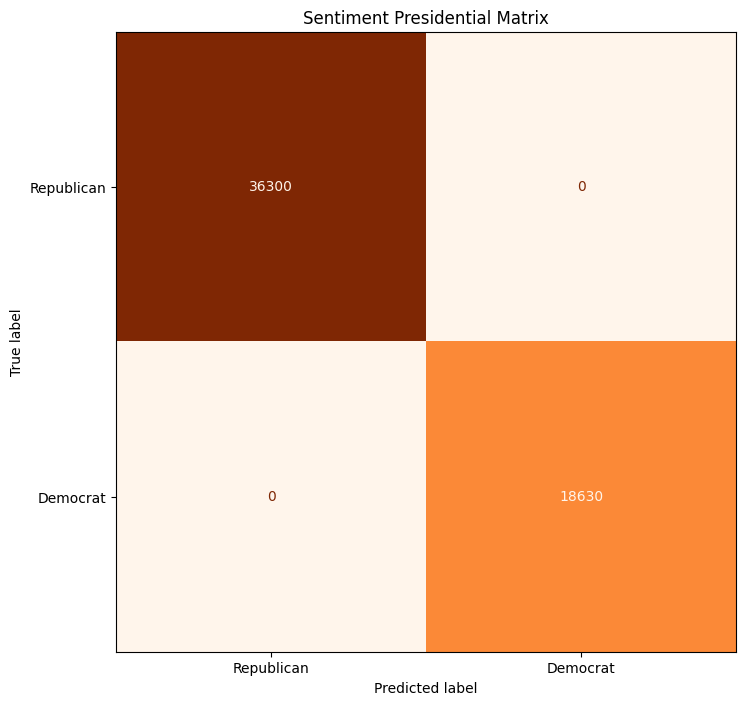

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test and logistic_predictions are defined
fig, ax = plt.subplots(figsize=(8, 10))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    logistic_predictions,  
    ax=ax,
    display_labels=["Republican", "Democrat"], 
    colorbar=False,
    cmap='Oranges'  # Added colormap for clarity
)
plt.title("Sentiment Presidential Matrix")
# Save the plot to a .png file
plt.savefig("Visualizations/Sentiment_confusion_matrix.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

## Model Using Tensorflow

In [30]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### Compile, Train and Evaluate the Model

In [31]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
first_hidden_layer = 90
second_hidden_layer = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=first_hidden_layer, input_dim = input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=second_hidden_layer, activation = 'sigmoid'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1,activation = 'sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 90)                450       
                                                                 
 dense_1 (Dense)             (None, 30)                2730      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3211 (12.54 KB)
Trainable params: 3211 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [33]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
5150/5150 [==============================] - 4s 657us/step - loss: 0.0083 - accuracy: 0.9985
Epoch 2/50
5150/5150 [==============================] - 3s 659us/step - loss: 3.0092e-05 - accuracy: 1.0000
Epoch 3/50
5150/5150 [==============================] - 3s 639us/step - loss: 2.2063e-06 - accuracy: 1.0000
Epoch 4/50
5150/5150 [==============================] - 3s 636us/step - loss: 1.7182e-07 - accuracy: 1.0000
Epoch 5/50
5150/5150 [==============================] - 3s 634us/step - loss: 1.8768e-08 - accuracy: 1.0000
Epoch 6/50
5150/5150 [==============================] - 3s 637us/step - loss: 1.1233e-08 - accuracy: 1.0000
Epoch 7/50
5150/5150 [==============================] - 3s 639us/step - loss: 1.0472e-08 - accuracy: 1.0000
Epoch 8/50
5150/5150 [==============================] - 3s 637us/step - loss: 1.0247e-08 - accuracy: 1.0000
Epoch 9/50
5150/5150 [==============================] - 3s 633us/step - loss: 1.0142e-08 - accuracy: 1.0000
Epoch 10/50
5150/5150 [=========

In [34]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1717/1717 - 1s - loss: 9.5772e-09 - accuracy: 1.0000 - 768ms/epoch - 447us/step
Loss: 9.577242110481166e-09, Accuracy: 1.0


In [35]:
# Export our model to HDF5 file
nn.save("ML_output/Sentimental_Presidential_ML")

INFO:tensorflow:Assets written to: ML_output/Sentimental_Presidential_ML/assets


INFO:tensorflow:Assets written to: ML_output/Sentimental_Presidential_ML/assets
